## Applied Artificial Intelligence 2025 T3
### Lab 1 - Making Predictions with Regression

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
my_train_dataframe=pd.read_csv('bbdc_2018/train-en.csv')
my_train_dataframe

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2016-01-01 0:00:00,8.490,10.7700,12.690,188.00,190.00,194.00,9.0700,9.6300,10.0600,10.43,10.7800,11.0500,11.5400,11.9400,12.4200,0,122400,79168
1,2016-01-01 0:15:00,8.395,10.6175,12.475,190.75,193.00,196.75,9.0425,9.5550,9.9550,10.31,10.6300,10.9275,11.3875,11.8150,12.3125,1,122400,75124
2,2016-01-01 0:30:00,8.300,10.4650,12.260,193.50,196.00,199.50,9.0150,9.4800,9.8500,10.19,10.4800,10.8050,11.2350,11.6900,12.2050,1,122400,76072
3,2016-01-01 0:45:00,8.205,10.3125,12.045,196.25,199.00,202.25,8.9875,9.4050,9.7450,10.07,10.3300,10.6825,11.0825,11.5650,12.0975,1,122400,67964
4,2016-01-01 1:00:00,8.110,10.1600,11.830,199.00,202.00,205.00,8.9600,9.3300,9.6400,9.95,10.1800,10.5600,10.9300,11.4400,11.9900,0,122400,69988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52503,2017-06-30 22:45:00,4.920,5.9475,6.580,269.25,271.25,272.50,4.5700,5.0375,5.4325,5.73,6.0125,6.2125,6.4175,6.7325,7.2175,1,119000,13688
52504,2017-06-30 23:00:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,0,119000,17624
52505,2017-06-30 23:15:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000,18528
52506,2017-06-30 23:30:00,5.030,6.0900,6.730,269.00,271.00,272.00,4.6800,5.1800,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000,15836


In [3]:
my_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52508 entries, 0 to 52507
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                52508 non-null  object 
 1   wind_speed48M       52508 non-null  float64
 2   wind_speed100M      52508 non-null  float64
 3   wind_speed152M      52508 non-null  float64
 4   wind_direction48M   52508 non-null  float64
 5   wind_direction100M  52508 non-null  float64
 6   wind_direction152M  52508 non-null  float64
 7   wind_speed_100MP10  52508 non-null  float64
 8   wind_speed_100MP20  52508 non-null  float64
 9   wind_speed_100MP30  52508 non-null  float64
 10  wind_speed_100MP40  52508 non-null  float64
 11  wind_speed_100MP50  52508 non-null  float64
 12  wind_speed_100MP60  52508 non-null  float64
 13  wind_speed_100MP70  52508 non-null  float64
 14  wind_speed_100MP80  52508 non-null  float64
 15  wind_speed_100MP90  52508 non-null  float64
 16  Inte

In [4]:
my_train_dataframe.isna().sum()

Date                  0
wind_speed48M         0
wind_speed100M        0
wind_speed152M        0
wind_direction48M     0
wind_direction100M    0
wind_direction152M    0
wind_speed_100MP10    0
wind_speed_100MP20    0
wind_speed_100MP30    0
wind_speed_100MP40    0
wind_speed_100MP50    0
wind_speed_100MP60    0
wind_speed_100MP70    0
wind_speed_100MP80    0
wind_speed_100MP90    0
Interpolated          0
available_capacity    0
Output                0
dtype: int64

In [5]:
my_test_dataframe=pd.read_csv('bbdc_2018/challenge-en.csv')
my_test_dataframe

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2017-07-01 0:00:00,4.8500,5.810,6.4100,263.00,266.0,268.0,3.9200,4.7500,5.1600,5.53,5.820,6.0400,6.3000,6.8500,7.460,0,119000,X
1,2017-07-01 0:15:00,4.9250,5.885,6.5000,262.75,265.5,267.5,3.9625,4.8175,5.2725,5.61,5.895,6.1425,6.4150,6.9275,7.535,1,119000,X
2,2017-07-01 0:30:00,5.0000,5.960,6.5900,262.50,265.0,267.0,4.0050,4.8850,5.3850,5.69,5.970,6.2450,6.5300,7.0050,7.610,1,119000,X
3,2017-07-01 0:45:00,5.0750,6.035,6.6800,262.25,264.5,266.5,4.0475,4.9525,5.4975,5.77,6.045,6.3475,6.6450,7.0825,7.685,1,119000,X
4,2017-07-01 1:00:00,5.1500,6.110,6.7700,262.00,264.0,266.0,4.0900,5.0200,5.6100,5.85,6.120,6.4500,6.7600,7.1600,7.760,0,119000,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17663,2017-12-31 22:45:00,10.2775,12.295,13.7275,209.50,211.5,212.5,10.2825,10.8675,11.4025,11.90,12.315,12.6400,13.1375,13.6550,14.430,1,122400,X
17664,2017-12-31 23:00:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,0,122400,X
17665,2017-12-31 23:15:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,1,122400,X
17666,2017-12-31 23:30:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,1,122400,X


In [6]:
my_validation_dataframe=pd.read_csv('bbdc_2018/eval-en.csv')
my_validation_dataframe

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2017-07-01 00:00:00,4.8500,5.810,6.4100,263.00,266.0,268.0,3.9200,4.7500,5.1600,5.53,5.820,6.0400,6.3000,6.8500,7.460,0,119000,15912
1,2017-07-01 00:15:00,4.9250,5.885,6.5000,262.75,265.5,267.5,3.9625,4.8175,5.2725,5.61,5.895,6.1425,6.4150,6.9275,7.535,1,119000,18736
2,2017-07-01 00:30:00,5.0000,5.960,6.5900,262.50,265.0,267.0,4.0050,4.8850,5.3850,5.69,5.970,6.2450,6.5300,7.0050,7.610,1,119000,19680
3,2017-07-01 00:45:00,5.0750,6.035,6.6800,262.25,264.5,266.5,4.0475,4.9525,5.4975,5.77,6.045,6.3475,6.6450,7.0825,7.685,1,119000,18112
4,2017-07-01 01:00:00,5.1500,6.110,6.7700,262.00,264.0,266.0,4.0900,5.0200,5.6100,5.85,6.120,6.4500,6.7600,7.1600,7.760,0,119000,21144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17663,2017-12-31 22:45:00,10.2775,12.295,13.7275,209.50,211.5,212.5,10.2825,10.8675,11.4025,11.90,12.315,12.6400,13.1375,13.6550,14.430,1,122400,111028
17664,2017-12-31 23:00:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,0,122400,90668
17665,2017-12-31 23:15:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,1,122400,103344
17666,2017-12-31 23:30:00,10.3800,12.410,13.8500,209.00,211.0,212.0,10.4400,11.0100,11.5600,12.08,12.420,12.7200,13.2600,13.7500,14.620,1,122400,115660


In [7]:
x_train_dataframe=pd.read_csv('bbdc_2018/train-en.csv',usecols=["wind_speed48M"]) 
y_train_dataframe=pd.read_csv('bbdc_2018/train-en.csv', usecols=["Output"])

In [8]:
(x_train_dataframe)

,wind_speed48M
0,8.490
1,8.395
2,8.300
3,8.205
4,8.110
...,...
52503,4.920
52504,5.030
52505,5.030
52506,5.030


In [9]:
(x_train_dataframe)

,wind_speed48M
0,8.490
1,8.395
2,8.300
3,8.205
4,8.110
...,...
52503,4.920
52504,5.030
52505,5.030
52506,5.030


In [10]:
# Lets compute individual statistics for mean, variance, std, min and max
# Mean
mean_output = y_train_dataframe["Output"].mean()

# Variance
variance_output = y_train_dataframe["Output"].var()

# Standard Deviation
std_output = y_train_dataframe["Output"].std()

# Min and Max
minimum_output = y_train_dataframe["Output"].min()
maximum_output = y_train_dataframe["Output"].max()

print(f"Mean: {mean_output:.2f}")
print(f"Variance: {variance_output:.2f}")
print(f"Standard Deviation: {std_output:.2f}")
print(f"Min: {minimum_output}")
print(f"Max: {maximum_output}")

Mean: 27293.66
Variance: 859300291.38
Standard Deviation: 29313.82
Min: -1628
Max: 120520


In [11]:
# Lets compute individual statistics for mean, variance, std, min and max
# Mean
mean_output = my_train_dataframe.mean(numeric_only=True)
# Variance
variance_output = my_train_dataframe.var(numeric_only=True)
# Standard deviation
std_output = my_train_dataframe.std(numeric_only=True)
# Minimum
min_output = my_train_dataframe.min(numeric_only=True)
# Maximum
max_output = my_train_dataframe.max(numeric_only=True)

# Print all together (optional)
print("Mean:\n", mean_output)
print("Variance:\n", variance_output)
print("Standard Deviation:\n", std_output)
print("Min:\n", min_output)
print("Max:\n", max_output)

Mean:
 wind_speed48M              5.626846
wind_speed100M             6.834925
wind_speed152M             7.583339
wind_direction48M        189.824055
wind_direction100M       191.399815
wind_direction152M       193.528853
wind_speed_100MP10         5.416193
wind_speed_100MP20         5.886837
wind_speed_100MP30         6.261161
wind_speed_100MP40         6.550166
wind_speed_100MP50         6.848693
wind_speed_100MP60         7.120104
wind_speed_100MP70         7.410151
wind_speed_100MP80         7.785677
wind_speed_100MP90         8.255469
Interpolated               0.750000
available_capacity    120019.562733
Output                 27293.661461
dtype: float64
Variance:
 wind_speed48M         6.085039e+00
wind_speed100M        8.312220e+00
wind_speed152M        1.074721e+01
wind_direction48M     8.336388e+03
wind_direction100M    8.421371e+03
wind_direction152M    8.438228e+03
wind_speed_100MP10    7.663570e+00
wind_speed_100MP20    7.879504e+00
wind_speed_100MP30    8.044970e+00
wind

In [12]:
# Compute some basic statistics
# For the whole x_train_dataframe
(my_train_dataframe.describe())

,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
count,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000,52508.000000
mean,5.626846,6.834925,7.583339,189.824055,191.399815,193.528853,5.416193,5.886837,6.261161,6.550166,6.848693,7.120104,7.410151,7.785677,8.255469,0.750000,120019.562733,27293.661461
std,2.466787,2.883092,3.278293,91.303825,91.768030,91.859828,2.768315,2.807045,2.836366,2.860242,2.884179,2.906680,2.930317,2.959489,2.998728,0.433017,4636.559770,29313.824237
min,0.550000,0.580000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.370000,0.580000,0.740000,1.000000,1.330000,1.740000,0.000000,0.000000,-1628.000000
25%,3.925000,4.850000,5.225000,119.000000,119.500000,122.000000,3.525000,3.969375,4.320000,4.590000,4.865000,5.120000,5.395000,5.752500,6.190000,0.750000,119000.000000,4928.000000
50%,5.330000,6.650000,7.395000,207.000000,209.250000,212.000000,5.250000,5.720000,6.090000,6.370000,6.662500,6.930000,7.213750,7.575000,8.035000,1.000000,122400.000000,17300.000000
75%,6.965000,8.555000,9.700000,255.500000,258.000000,260.500000,7.075000,7.577500,7.960000,8.260000,8.570000,8.850000,9.160000,9.545000,10.030000,1.000000,122400.000000,40415.000000
max,18.870000,21.690000,23.360000,360.000000,360.000000,360.000000,19.610000,20.180000,20.750000,21.380000,21.700000,22.160000,22.580000,22.980000,23.470000,1.000000,122400.000000,120520.000000


In [13]:
# For y_train_dataframe (Output column specifically)
(y_train_dataframe["Output"].describe())

count     52508.000000
mean      27293.661461
std       29313.824237
min       -1628.000000
25%        4928.000000
50%       17300.000000
75%       40415.000000
max      120520.000000
Name: Output, dtype: float64

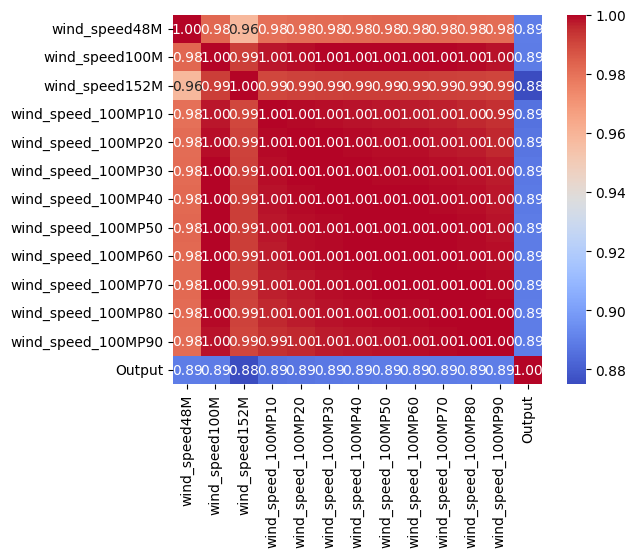

<Figure size 1400x1200 with 0 Axes>

In [14]:
# Step 1: Select wind speed columns + Output only
wind_speed_cols = [col for col in my_train_dataframe.columns if "wind_speed" in col]
wind_speed_cols.append("Output")

correlation_matrics_df = my_train_dataframe[wind_speed_cols].copy()
correlation_matrics_df["Output"] = y_train_dataframe["Output"]

# Step 2: Compute correlation matrix
correlation_matrix = correlation_matrics_df.corr(numeric_only=True)

# Step 3: Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.figure(figsize=(14, 12))
plt.show()

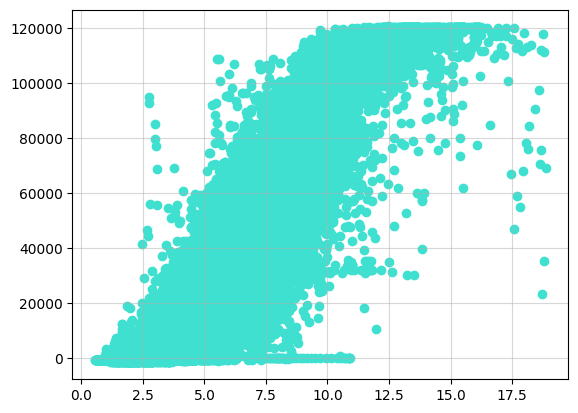

In [15]:
# visualization
plt.scatter(x_train_dataframe["wind_speed48M"],y_train_dataframe["Output"], color="turquoise") 
plt.grid(True, alpha=0.5)
plt.show()

In [16]:
def combined_outliers(x, y, threshold=3, xlabel="X", ylabel="Y", title="Outliers in Both X and Y"):
    """
    Plots a scatter plot of x vs y and highlights points that are outliers
    in both x and y using Z-score method.

    Parameters
    ----------
    x : pandas Series or array-like
        Independent variable (e.g., wind speed)
    y : pandas Series or array-like
        Dependent variable (e.g., Output)
    threshold : float
        Z-score threshold for flagging outliers
    xlabel, ylabel, title : str
        Plot labels
    """
    # Compute Z-scores
    z_x = zscore(x)
    z_y = zscore(y)

    # Flag where both x and y are outliers
    is_outlier = (np.abs(z_x) > threshold) & (np.abs(z_y) > threshold)

    # Plot
    plt.scatter(x[~is_outlier], y[~is_outlier], color='turquoise', label="Normal")
    plt.scatter(x[is_outlier], y[is_outlier], color='red', label="Outlier (x & y)")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

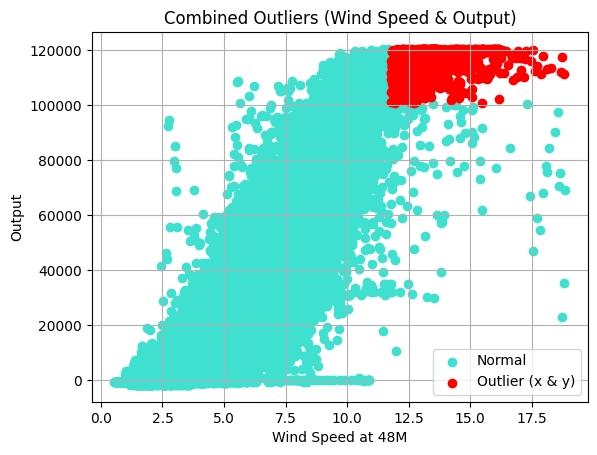

In [17]:
combined_outliers(
    x=x_train_dataframe["wind_speed48M"],
    y=y_train_dataframe["Output"],
    threshold=2.5,
    xlabel="Wind Speed at 48M",
    ylabel="Output",
    title="Combined Outliers (Wind Speed & Output)"
)

In [18]:
# Split features and target from eval set
# Assuming the target column is also named "Output"
# Align test features to match training features exactly
x_test = my_validation_dataframe[x_train_dataframe.columns]
y_test = my_validation_dataframe["Output"]

# Train the Linear Regression model on training data
reg = LinearRegression()
reg.fit(x_train_dataframe, y_train_dataframe)

# Evaluate model on training data
train_score = reg.score(x_train_dataframe, y_train_dataframe)
print(f"Training R^2 Score: {train_score:.2f}")

# Make predictions on unseen test data
predictions = reg.predict(x_test)

# Print predictions for inspection
print("Predictions on x_test:")
print(predictions)

Training R^2 Score: 0.79
Predictions on x_test:
[[19082.66141229]
 [19875.38570799]
 [20668.11000369]
 ...
 [77532.8661483 ]
 [77532.8661483 ]
 [77532.8661483 ]]


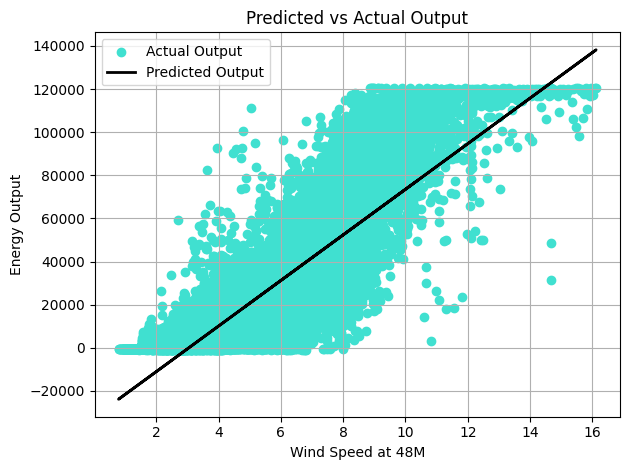

In [19]:
# Scatter actual test data
plt.scatter(x_test["wind_speed48M"], y_test, color="turquoise", label="Actual Output")

# Line plot of predictions
plt.plot(x_test["wind_speed48M"], predictions, color="black", linewidth=2, label="Predicted Output")

# Labels and legend
plt.xlabel("Wind Speed at 48M")
plt.ylabel("Energy Output")
plt.title("Predicted vs Actual Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

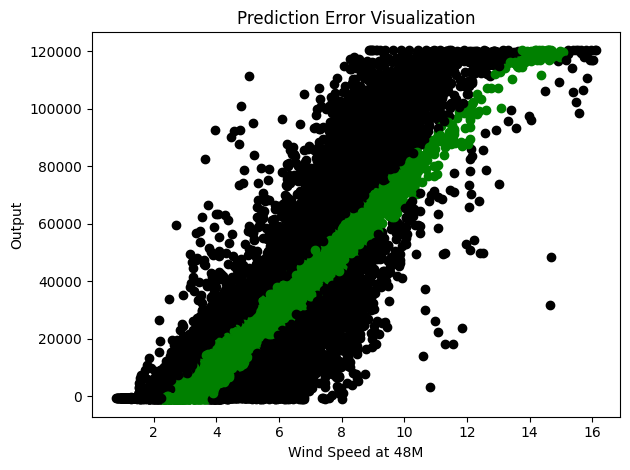

In [20]:
discrete_error = []

for i in range(len(y_test)):
    error = y_test.iloc[i] - predictions[i]  # Access value with .iloc

    if error > 8000 or error < -8000:
        discrete_error.append(1)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test.iloc[i], color="black") 
    else:
        discrete_error.append(0)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test.iloc[i], color="green")

plt.xlabel("Wind Speed at 48M")
plt.ylabel("Output")
plt.title("Prediction Error Visualization")
plt.tight_layout()
plt.show()

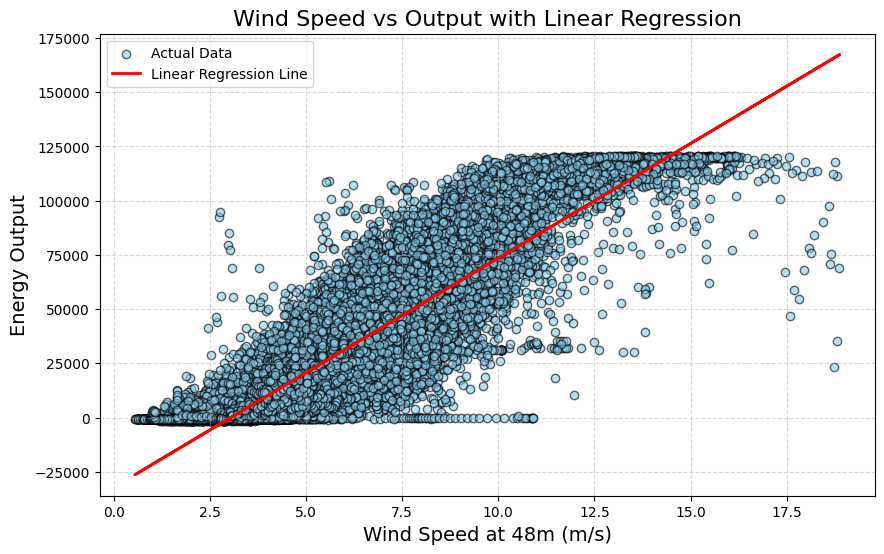

In [21]:
# Reshape if needed (scikit-learn expects 2D input for X)
X = x_train_dataframe["wind_speed48M"].values.reshape(-1, 1)
y = y_train_dataframe["Output"].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="skyblue", edgecolor="black", alpha=0.6, label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Line")

plt.title("Wind Speed vs Output with Linear Regression", fontsize=16)
plt.xlabel("Wind Speed at 48m (m/s)", fontsize=14)
plt.ylabel("Energy Output", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
#plt.tight_layout()
plt.show()

In [22]:
import itertools

def compare_numeric_features_with_outliers(df, threshold=2.5, max_plots=10):
    """
    Compares each numeric feature against each other with scatter plots and
    highlights outliers using Z-score method.

    Parameters
    ----------
    df : pandas DataFrame
        DataFrame containing numeric features
    threshold : float
        Z-score threshold for outlier detection
    max_plots : int
        Max number of plots to show (to avoid too many figures)
    """
    numeric_df = df.select_dtypes(include='number')
    pairs = list(itertools.combinations(numeric_df.columns, 2))

    plot_count = 0

    for x_col, y_col in pairs:
        if plot_count >= max_plots:
            print("Max plot limit reached. Use max_plots to see more.")
            break

        x = numeric_df[x_col]
        y = numeric_df[y_col]

        z_x = zscore(x)
        z_y = zscore(y)

        is_outlier = (np.abs(z_x) > threshold) & (np.abs(z_y) > threshold)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x[~is_outlier], y[~is_outlier], color='green', label='Normal')
        plt.scatter(x[is_outlier], y[is_outlier], color='black', label='Outlier (x & y)')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f"{x_col} vs {y_col} (Z-Score Outliers)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plot_count += 1

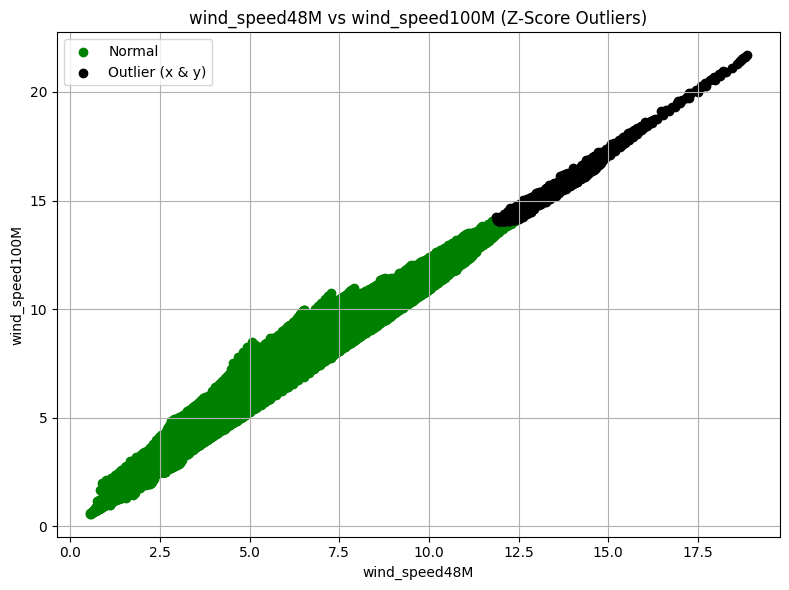

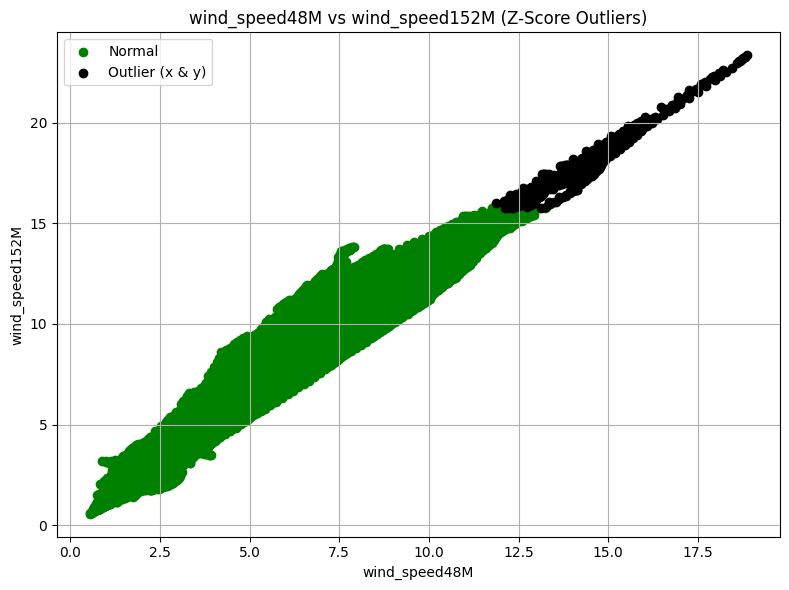

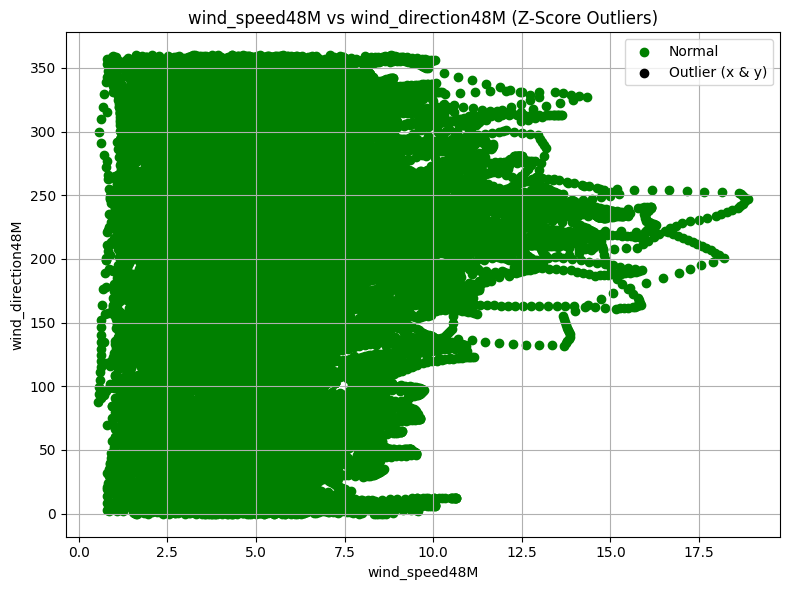

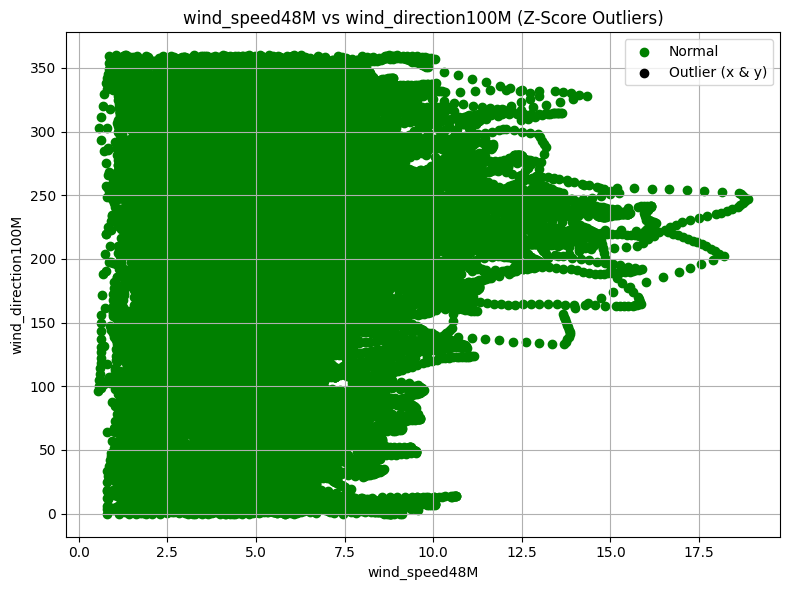

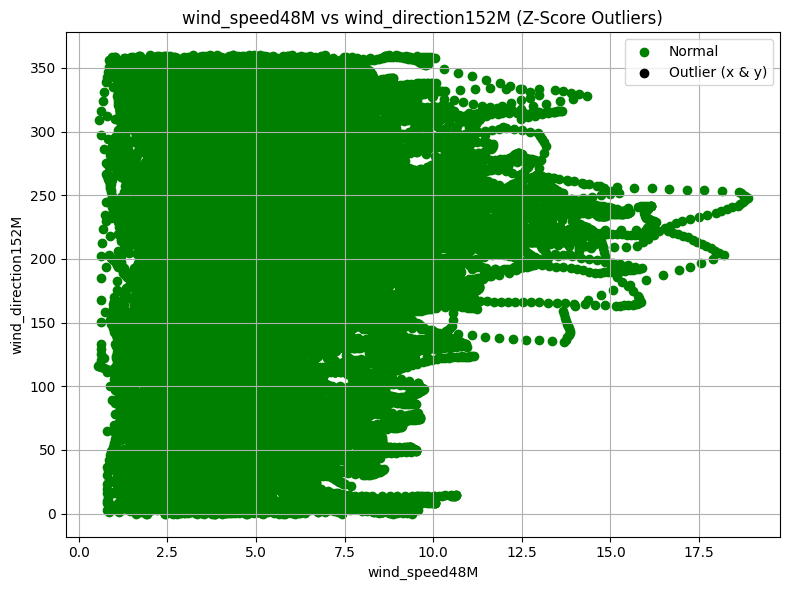

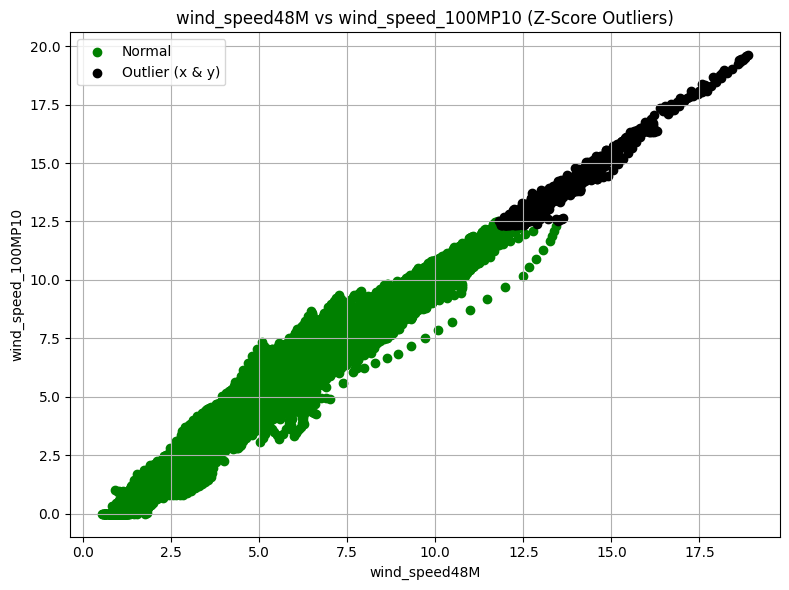

Max plot limit reached. Use max_plots to see more.


In [23]:
compare_numeric_features_with_outliers(my_train_dataframe, threshold=2.5, max_plots=6)

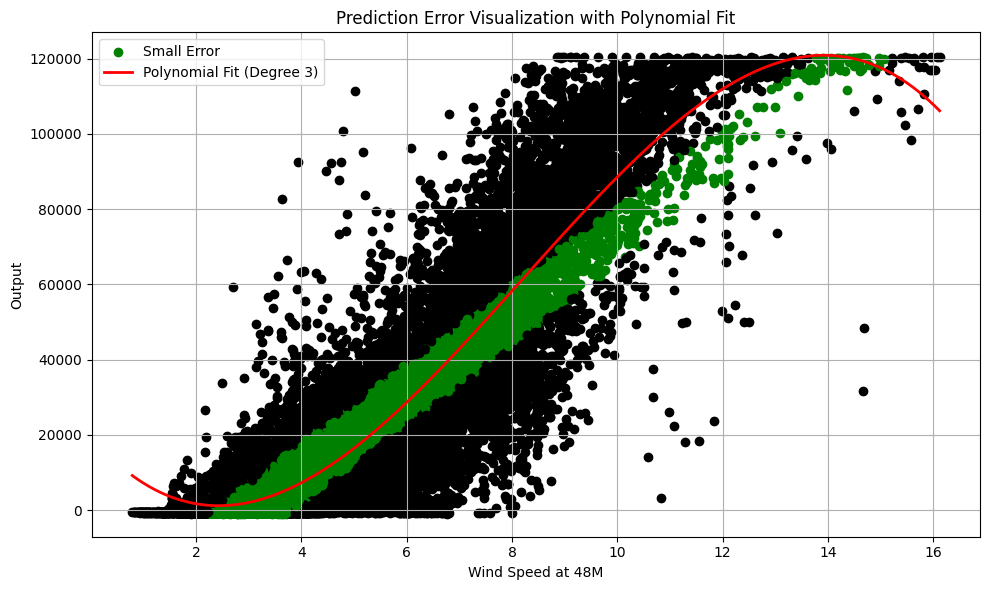

In [24]:
# Fit a polynomial model (e.g., degree 3)
degree = 3
x_poly = x_test["wind_speed48M"].values.reshape(-1, 1)
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x_poly, y_test)
poly_predictions = poly_model.predict(x_poly)

# Error-based scatter
discrete_error = []

plt.figure(figsize=(10, 6))

for i in range(len(y_test)):
    error = y_test.iloc[i] - predictions[i]  # predictions = linear model output

    if error > 8000 or error < -8000:
        discrete_error.append(1)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test.iloc[i], color="black", label="Large Error" if i == 0 else "")
    else:
        discrete_error.append(0)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test.iloc[i], color="green", label="Small Error" if i == 0 else "")

# Smooth x range for the polynomial fit line
x_range = np.linspace(x_poly.min(), x_poly.max(), 300).reshape(-1, 1)
poly_line = poly_model.predict(x_range)

# Add polynomial line
plt.plot(x_range, poly_line, color="red", linewidth=2, label=f"Polynomial Fit (Degree {degree})")

# Labels and legend
plt.xlabel("Wind Speed at 48M")
plt.ylabel("Output")
plt.title("Prediction Error Visualization with Polynomial Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
def plot_polynomial_fits_separately(x, y, degrees=[1, 2, 3], xlabel="X", ylabel="Y", title_prefix="Polynomial Fit: Degree "):
    """
    Fit and plot polynomial regression models for multiple degrees on separate plots.

    Parameters
    ----------
    x : pandas Series or array-like
        Independent variable
    y : pandas Series or array-like
        Dependent variable
    degrees : list of int
        List of polynomial degrees to plot
    xlabel : str
        Label for x-axis
    ylabel : str
        Label for y-axis
    title_prefix : str
        Prefix for plot titles
    """
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    x_plot = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

    for degree in degrees:
        # Create and fit polynomial model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x, y)
        y_plot = model.predict(x_plot)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color="turquoise", label="Actual Output", alpha=0.6)
        plt.plot(x_plot, y_plot, color="red", linewidth=2, label=f"Polynomial Degree {degree}")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f"{title_prefix}{degree}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

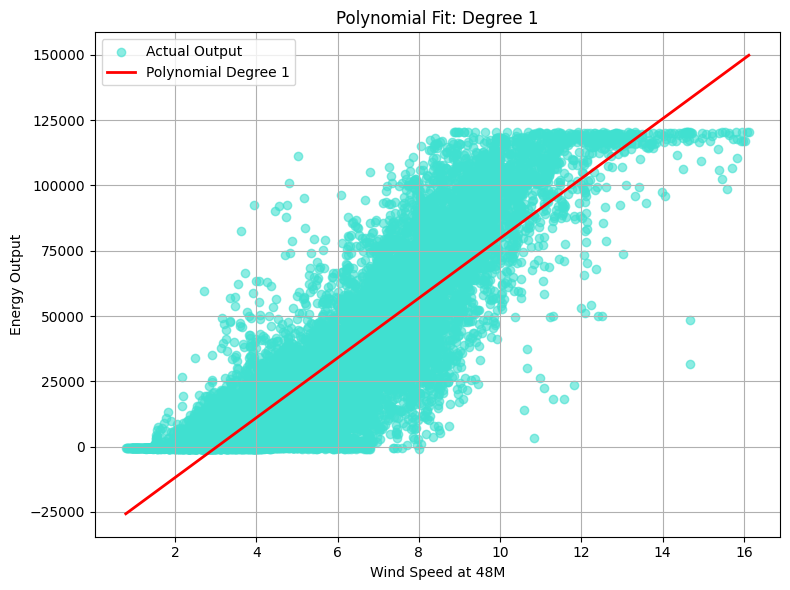

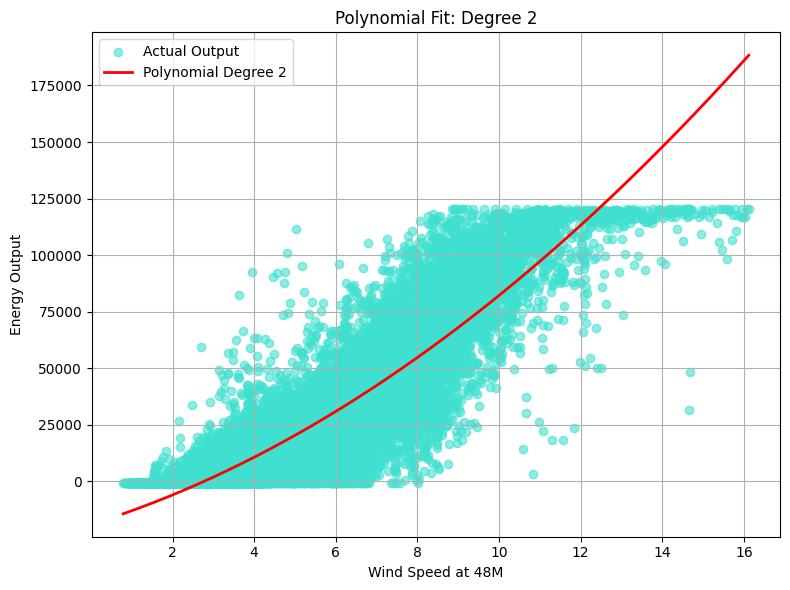

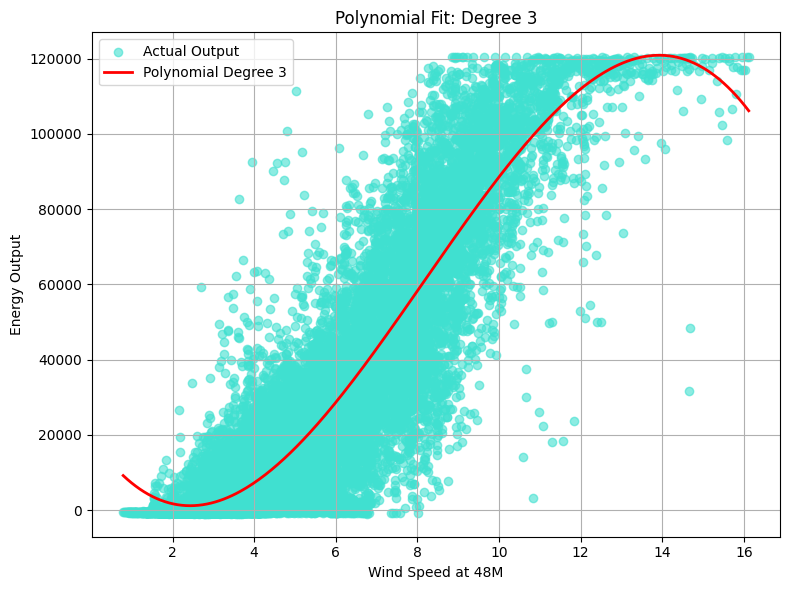

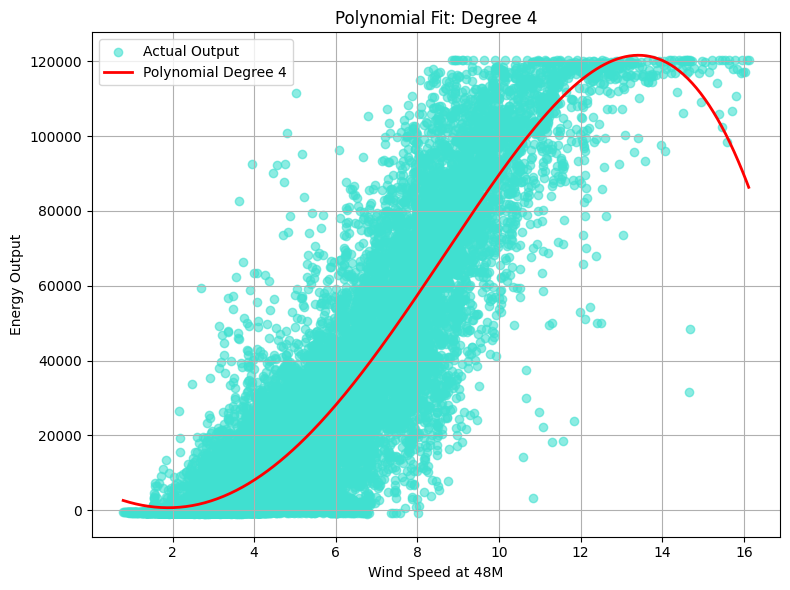

In [26]:
plot_polynomial_fits_separately(
    x=x_test["wind_speed48M"],
    y=y_test,
    degrees=[1, 2, 3, 4],
    xlabel="Wind Speed at 48M",
    ylabel="Energy Output"
)

In [29]:
(poly_predictions)

array([14855.67102972, 15643.43708913, 16448.51421048, ...,
       93769.69274256, 93769.69274256, 93769.69274256], shape=(17668,))